# **Diagnostic AI: Pediatric Pneumonia Detection Research**



Pediatric Pneumonia Detection using Deep Learning Objective: The primary goal of this research project is to develop a high-precision Convolutional Neural Network (CNN) model capable of identifying Pneumonia from pediatric chest X-ray images. By leveraging a balanced dataset and advanced image preprocessing, we aim to minimize diagnostic errors and assist medical professionals in early detection.

### 📂 Step 1 — Dataset Download using KaggleHub

In this step, we download the Pediatric Chest X-ray Pneumonia dataset directly from Kaggle using KaggleHub.
This method avoids manual upload and automatically stores the dataset in the Colab environment for further processing.


In [ ]:
!pip install kagglehub

import kagglehub

path = kagglehub.dataset_download(
    "yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset"
)

print("Dataset Path:", path)


100%|██████████| 1.66G/1.66G [00:17<00:00, 105MB/s]

Extracting files...


Dataset Path: /root/.cache/kagglehub/datasets/yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset/versions/1


### 📁 Step 2 — Understanding Dataset Structure

Here, we explore the dataset directory to verify its structure.
We check whether it contains Train, Validation, and Test folders along with their respective class subfolders (NORMAL and PNEUMONIA).


In [ ]:
import os

os.listdir(path)


['NORMAL', 'PNEUMONIA']

### 📁 Step 2.1 — Exploring Complete Dataset Directory

In this step, we explore the full directory tree of the downloaded dataset to understand its internal folder hierarchy.
This helps us identify whether the dataset is already split into training, validation, and testing sets or if we need to perform the split manually.


In [ ]:
for root, dirs, files in os.walk(path):
    print("Root:", root)
    print("Folders:", dirs)
    print("Files count:", len(files))
    print("-"*40)


Root: /root/.cache/kagglehub/datasets/yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset/versions/1
Folders: ['NORMAL', 'PNEUMONIA']
Files count: 0
----------------------------------------
Root: /root/.cache/kagglehub/datasets/yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset/versions/1/NORMAL
Folders: []
Files count: 4265
----------------------------------------
Root: /root/.cache/kagglehub/datasets/yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset/versions/1/PNEUMONIA
Folders: []
Files count: 4265
----------------------------------------


### 📂 Step 3 — Dataset Splitting (Train / Validation / Test)

In this step, we split the dataset into three subsets: Training, Validation, and Testing.

Since the dataset is not pre-split, we manually divide the images into:

* 70% Training set
* 15% Validation set
* 15% Testing set

This ensures that the model is trained on one portion of the data and evaluated on unseen data for fair performance assessment.


In [ ]:
import os
import shutil
import random


### 📁 Creating Directory Structure for Split Data

Here, we create a new directory structure to store the split datasets.
Each subset (Train, Validation, Test) will contain two class folders: NORMAL and PNEUMONIA.


In [ ]:
base_dir = "/content/chest_xray_split"

folders = [
    "train/NORMAL",
    "train/PNEUMONIA",
    "val/NORMAL",
    "val/PNEUMONIA",
    "test/NORMAL",
    "test/PNEUMONIA"
]

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)


### 🔀 Splitting Images into Train, Validation, and Test Sets

In this step, we randomly shuffle the images and divide them into training, validation, and testing subsets according to the defined ratios.


In [ ]:
def split_data(source, train, val, test, split_ratio=(0.7, 0.15, 0.15)):

    images = os.listdir(source)
    random.shuffle(images)

    total = len(images)
    train_end = int(split_ratio[0] * total)
    val_end = int((split_ratio[0] + split_ratio[1]) * total)

    train_imgs = images[:train_end]
    val_imgs = images[train_end:val_end]
    test_imgs = images[val_end:]

    for img in train_imgs:
        shutil.copy(os.path.join(source, img), train)

    for img in val_imgs:
        shutil.copy(os.path.join(source, img), val)

    for img in test_imgs:
        shutil.copy(os.path.join(source, img), test)


### 🚀 Applying Dataset Splitting

Here, we apply the splitting function to both classes (Normal and Pneumonia) to generate the final dataset structure for model training and evaluation.


In [ ]:
original_path = path

split_data(
    original_path + "/NORMAL",
    base_dir + "/train/NORMAL",
    base_dir + "/val/NORMAL",
    base_dir + "/test/NORMAL"
)

split_data(
    original_path + "/PNEUMONIA",
    base_dir + "/train/PNEUMONIA",
    base_dir + "/val/PNEUMONIA",
    base_dir + "/test/PNEUMONIA"
)

print("Dataset splitting completed ✅")


Dataset splitting completed ✅


### 📊 Verifying Dataset Split

In this step, we verify the number of images in each subset to ensure the dataset has been split correctly.


In [ ]:
for root, dirs, files in os.walk(base_dir):
    print(root, "→", len(files))


/content/chest_xray_split → 0
/content/chest_xray_split/val → 0
/content/chest_xray_split/val/NORMAL → 640
/content/chest_xray_split/val/PNEUMONIA → 640
/content/chest_xray_split/train → 0
/content/chest_xray_split/train/NORMAL → 2985
/content/chest_xray_split/train/PNEUMONIA → 2985
/content/chest_xray_split/test → 0
/content/chest_xray_split/test/NORMAL → 640
/content/chest_xray_split/test/PNEUMONIA → 640


### 🖼 Step 4 — Visualizing Sample Chest X-ray Images

In this step, we display sample images from both classes (Normal and Pneumonia) to visually understand the dataset.

This helps in identifying visible differences between healthy and infected lungs and ensures that images are loaded correctly before training the model.


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random


### 🔍 Displaying Random Samples from Each Class

Here, we randomly select images from both categories and display them for visual comparison.


In [ ]:
def show_samples(class_path, title):

    images = os.listdir(class_path)
    sample_images = random.sample(images, 4)

    plt.figure(figsize=(10,5))

    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1,4,i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")

    plt.show()


### 🫁 Normal Chest X-ray Samples

These images represent healthy lungs without pneumonia infection.


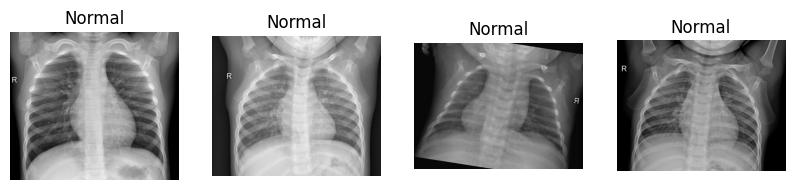

In [ ]:
show_samples(
    base_dir + "/train/NORMAL",
    "Normal"
)


### 🦠 Pneumonia Chest X-ray Samples

These images represent lungs affected by pneumonia infection, showing visible opacities or abnormalities.


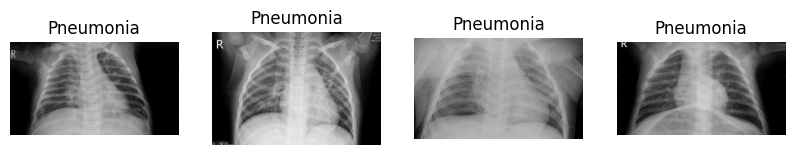

In [ ]:
show_samples(
    base_dir + "/train/PNEUMONIA",
    "Pneumonia"
)


### 🧹 Step 5 — Image Preprocessing and Data Augmentation

In this step, we prepare the dataset for model training by applying preprocessing techniques.

The preprocessing includes:

* Rescaling pixel values (normalization)
* Resizing images to a fixed shape
* Applying augmentation techniques to the training set

Data augmentation helps improve model generalization and reduces overfitting by creating slightly modified variations of existing images.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### 🔄 Training Data Generator with Augmentation

Here, we apply augmentation techniques such as rotation, zoom, and horizontal flipping to artificially expand the training dataset and improve model robustness.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)


### 📏 Validation and Test Data Preprocessing

For validation and testing datasets, we only apply rescaling.

No augmentation is used here to ensure fair evaluation on real, unmodified images.


In [ ]:
val_test_datagen = ImageDataGenerator(
    rescale=1./255
)


### 📥 Step 6 — Loading Images Using Data Generators

In this step, we load images from the split dataset directories using Keras data generators.

The images are resized to 224×224 pixels and converted into batches for efficient model training.


In [ ]:
img_size = (224, 224)
batch_size = 32


In [ ]:
train_data = train_datagen.flow_from_directory(
    base_dir + "/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 5970 images belonging to 2 classes.


In [ ]:
val_data = val_test_datagen.flow_from_directory(
    base_dir + "/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 1280 images belonging to 2 classes.


In [ ]:
test_data = val_test_datagen.flow_from_directory(
    base_dir + "/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 1280 images belonging to 2 classes.


### 🔎 Checking Class Indices

This step verifies how class labels are encoded by the generator.

Typically:

* Normal → 0
* Pneumonia → 1


In [ ]:
train_data.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

### 🧠 Step 7 — Building Transfer Learning Model (DenseNet121)

In this step, we build a deep learning model using the DenseNet121 architecture with pretrained ImageNet weights.

Transfer learning allows us to leverage previously learned features from large datasets, improving performance on medical imaging tasks such as pneumonia detection.


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models


### 📦 Loading Pretrained DenseNet121

Here, we load DenseNet121 without its top classification layer and use ImageNet pretrained weights for feature extraction.


In [ ]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### ❄ Freezing Base Model Layers

We freeze the convolutional base to prevent pretrained weights from updating during initial training.
This helps retain learned low-level image features.


In [ ]:
base_model.trainable = False


### 🏗 Adding Custom Classification Layers

We add new fully connected layers on top of the pretrained base model to adapt it for binary pneumonia classification.


In [ ]:
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(
    inputs=base_model.input,
    outputs=output
)


### ⚙ Compiling the Model

Here, we configure the model for training using:

* Adam optimizer
* Binary crossentropy loss
* Accuracy as evaluation metric


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,168,833 (27.35 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

### 🏋 Step 8 — Training the Transfer Learning Model

In this step, we train the DenseNet121-based transfer learning model using the prepared training and validation datasets.

The model learns to classify chest X-ray images as Normal or Pneumonia by optimizing its weights over multiple epochs.


In [ ]:
epochs = 15


### ⏹ Using Callbacks for Efficient Training

Callbacks help improve training efficiency:

* **EarlyStopping** stops training when validation performance stops improving.
* **ModelCheckpoint** saves the best-performing model weights.

This prevents overfitting and preserves the optimal model.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor='val_loss',
    save_best_only=True
)


### 🚀 Training the Model

Here, we train the model using the training dataset and validate it on the validation dataset to monitor performance.


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.8261 - loss: 0.3959

187/187 ━━━━━━━━━━━━━━━━━━━━ 197s 890ms/step - accuracy: 0.8265 - loss: 0.3952 - val_accuracy: 0.9375 - val_loss: 0.1605
Epoch 2/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.9413 - loss: 0.1681

187/187 ━━━━━━━━━━━━━━━━━━━━ 136s 728ms/step - accuracy: 0.9413 - loss: 0.1681 - val_accuracy: 0.9539 - val_loss: 0.1124
Epoch 3/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 133s 709ms/step - accuracy: 0.9301 - loss: 0.1677 - val_accuracy: 0.9477 - val_loss: 0.1364
Epoch 4/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 129s 692ms/step - accuracy: 0.9454 - loss: 0.1431 - val_accuracy: 0.9516 - val_loss: 0.1226
Epoch 5/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9488 - loss: 0.1401

187/187 ━━━━━━━━━━━━━━━━━━━━ 133s 712ms/step - accuracy: 0.9488 - loss: 0.1401 - val_accuracy: 0.9648 - val_loss: 0.0970
Epoch 6/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 130s 694ms/step - accuracy: 0.9475 - loss: 0.1406 - val_accuracy: 0.9609 - val_loss: 0.1016
Epoch 7/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 130s 695ms/step - accuracy: 0.9527 - loss: 0.1254 - val_accuracy: 0.9352 - val_loss: 0.1785
Epoch 8/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.9499 - loss: 0.1387

187/187 ━━━━━━━━━━━━━━━━━━━━ 134s 714ms/step - accuracy: 0.9500 - loss: 0.1386 - val_accuracy: 0.9617 - val_loss: 0.0949
Epoch 9/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 132s 706ms/step - accuracy: 0.9494 - loss: 0.1364 - val_accuracy: 0.9602 - val_loss: 0.1013
Epoch 10/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 131s 701ms/step - accuracy: 0.9531 - loss: 0.1263 - val_accuracy: 0.9563 - val_loss: 0.1119
Epoch 11/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 130s 695ms/step - accuracy: 0.9502 - loss: 0.1334 - val_accuracy: 0.9531 - val_loss: 0.1126


### 🧪 Step 10 — Evaluating Model on Test Dataset

In this step, we evaluate the trained model on the unseen test dataset to measure its real-world performance.

This ensures that the model generalizes well beyond the training data.


In [35]:
test_loss, test_accuracy = model.evaluate(test_data)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 310ms/step - accuracy: 0.9809 - loss: 0.0564
Test Accuracy: 0.967968761920929
Test Loss: 0.08696506917476654


### 📊 Step 11 — Generating Classification Report

Here, we compute precision, recall, and F1-score to better understand model performance, especially for medical diagnosis tasks.


In [36]:
import numpy as np
from sklearn.metrics import classification_report


In [37]:
predictions = model.predict(test_data)
pred_classes = (predictions > 0.5).astype("int32")

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

print(classification_report(true_classes, pred_classes, target_names=class_labels))


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 295ms/step
              precision    recall  f1-score   support

      NORMAL       0.95      0.98      0.97       640
   PNEUMONIA       0.98      0.95      0.97       640

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



### 🔲 Step 12 — Confusion Matrix Visualization

This step visualizes correct and incorrect predictions made by the model, helping identify false positives and false negatives.


In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


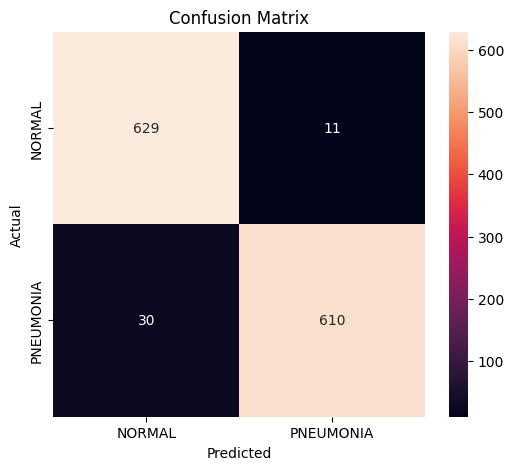

In [39]:
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predictions
y_pred = model.predict(test_data)

# Convert probabilities → classes
y_pred_classes = (y_pred > 0.5).astype("int32").reshape(-1)

# Confusion Matrix
cm = confusion_matrix(test_data.classes, y_pred_classes)
print(cm)

# Classification Report
print(classification_report(
    test_data.classes,
    y_pred_classes,
    target_names=['NORMAL','PNEUMONIA']
))


40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 287ms/step
[[629  11]
 [ 30 610]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.98      0.97       640
   PNEUMONIA       0.98      0.95      0.97       640

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



### 💾 Step — Saving Trained Model

Is step me hum apna trained CNN model save karte hain taake future me bina dobara training ke use load karke prediction kar saken.

Model ko `.keras` format me save karna recommended hai (HDF5 legacy ho chuka hai).


In [42]:
# Save model in Keras format
model.save("pneumonia_cnn_model.keras")


### ⬇️ Step — Downloading Model File

Is step me hum saved model file ko Google Colab se apne computer me download karte hain.


In [44]:
from google.colab import files

files.download("pneumonia_cnn_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>